In [1]:
# vou assumir q a secao ja existe
import os
from legacy.atributos import Atributos
secao = Atributos(os.path.join('data/existe/CL3822_maior.sgy'), resolucao = 25, deltaz = [9955, 2000])
secao.extent = [1, secao.X.shape[0] * secao.resolucao, 9955, 2000]

# Carregue o modelo treinado

In [2]:
import ipywidgets as widgets
upload = widgets.FileUpload(accept='.pkl', multiple=False)
display(upload)

FileUpload(value=(), accept='.pkl', description='Upload')

# Backend

In [4]:
import pickle
import io

from legacy.atributos import Atributos
from legacy.utils import plot, concatenate, subplot

In [5]:
file_content = upload.value[0]['content']
bytes_io = io.BytesIO(file_content)
rf = pickle.load(bytes_io)
# with open(upload.value, 'rb') as inp: 
#     clf = pickle.load(inp)

/home/remote/miniconda3/envs/entrega/lib/python3.10/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/remote/miniconda3/envs/entrega/lib/python3.10/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
secao._complexo()
secao._logaritmo()
secao._coherence()
secao._tecva()
secao._soterramento(marambaia = False)

In [6]:
mistura = [
    secao.X, 
    secao.envelope, secao.fase, secao.freq, secao.sweetness, 
    secao.log, 
    secao.yy, 
    secao.gersztenkorn, secao.sobel, secao.marfurt, 
    secao.tecva, secao.rms, 
    ]

X_tst = concatenate(mistura)

In [ ]:
secao.yhat = rf.predict(X_tst).reshape(secao.X.shape)

# Resultado

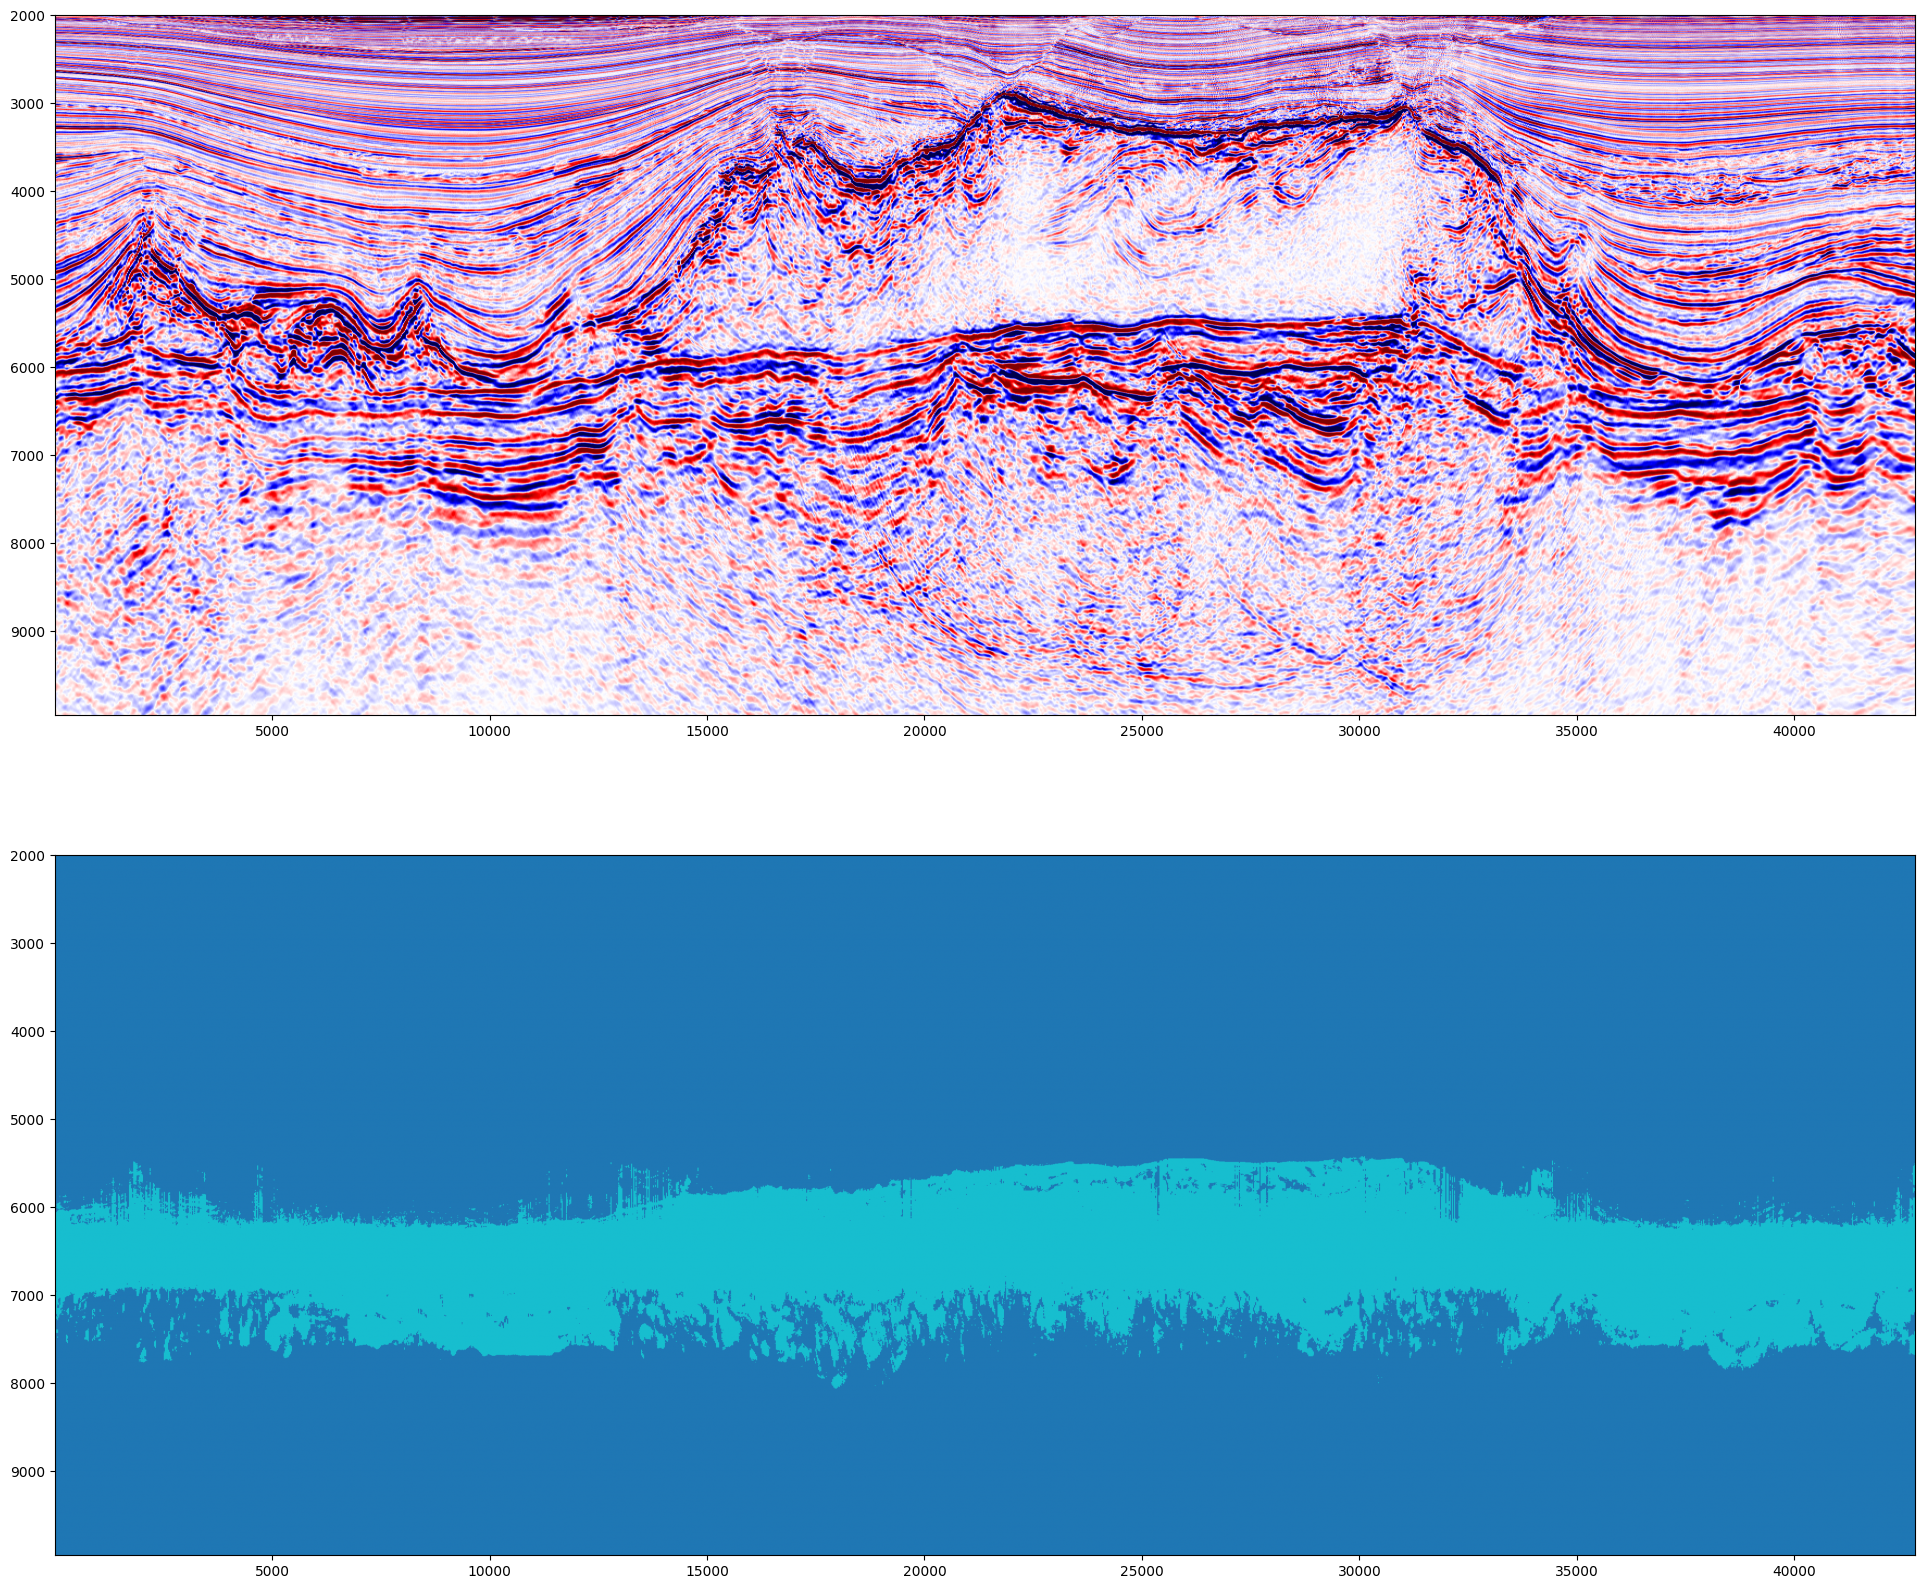

In [8]:
subplot(secao, [secao.X, secao.yhat], colors = ['seismic', 'tab10'], percentils = [(1, 99), (0, 100)])

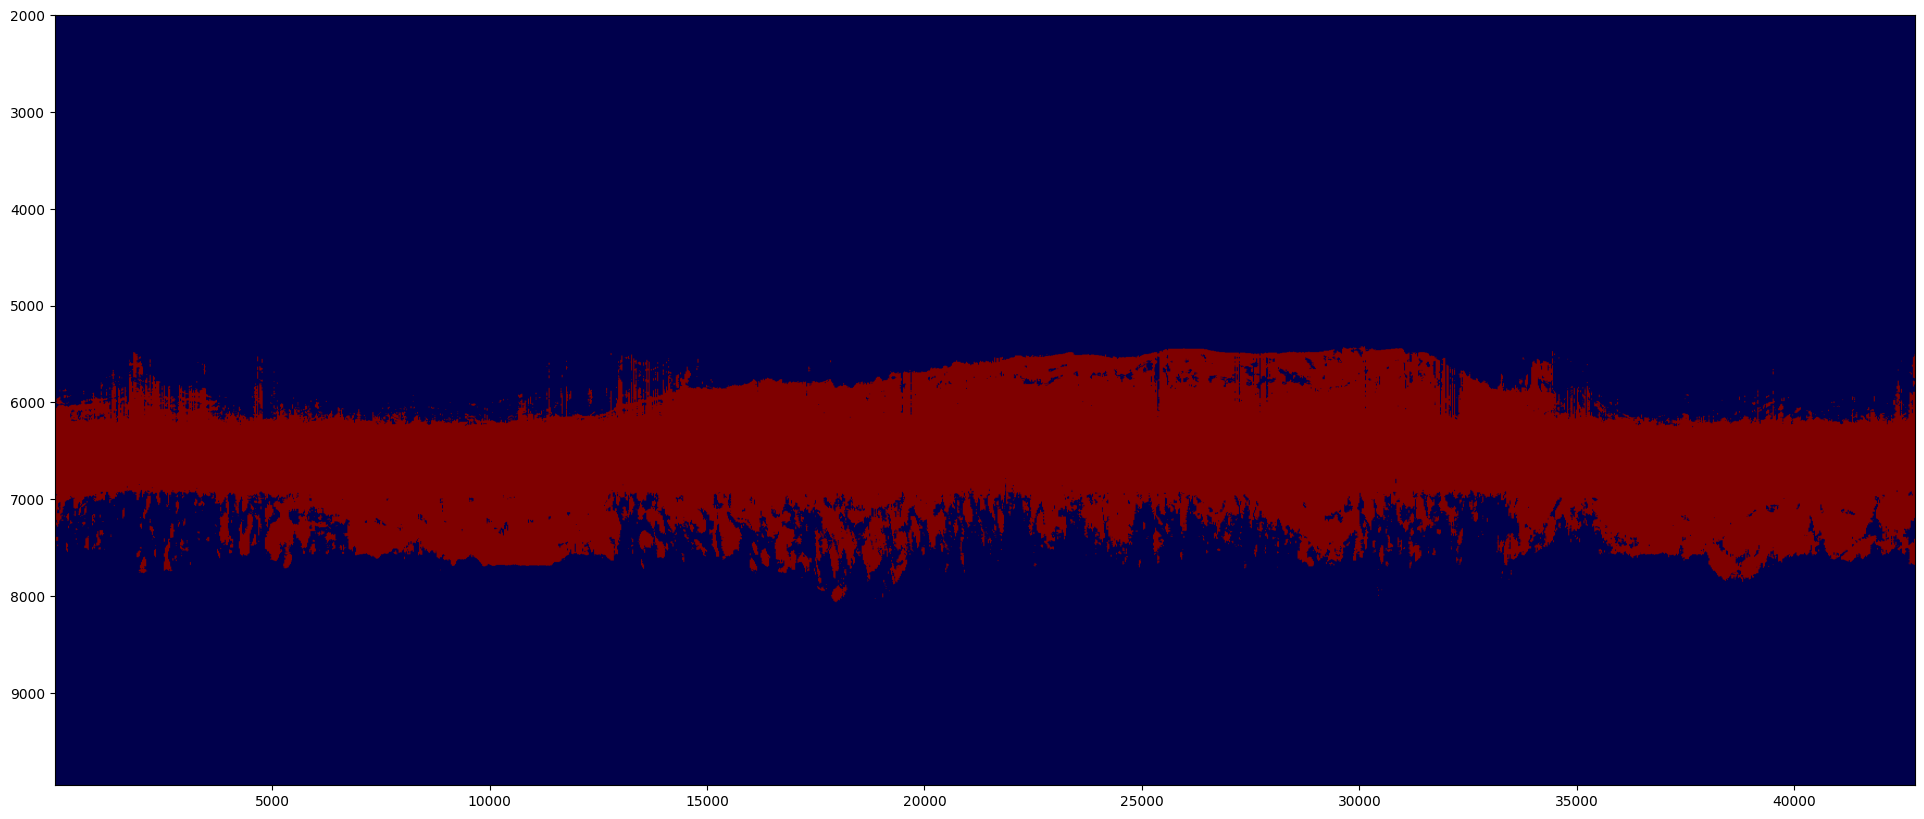

In [9]:
plot(secao, secao.yhat)